<a href="https://colab.research.google.com/github/maggiecrowner/DS4002-Project-2/blob/main/Preprocessing_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! git clone https://github.com/maggiecrowner/DS4002-Project-2.git

Cloning into 'DS4002-Project-2'...
remote: Enumerating objects: 23, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 23 (delta 4), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (23/23), 1003.30 KiB | 3.16 MiB/s, done.
Resolving deltas: 100% (4/4), done.


In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np

In [24]:
# Load data
df = pd.read_csv('/content/DS4002-Project-2/DATA/raw_temperature_data.csv').drop(columns=['Unnamed: 0', 'tmin'])

# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Filter for years 1970-2020
df = df[(df['Date'].dt.year >= 1970) & (df['Date'].dt.year <= 2023)]

# Set 'Date' as index
df.set_index('Date', inplace=True)

# Resample by month and compute mean
df_monthly = df.resample('ME').mean()

# Reset index properly
df_monthly = df_monthly.reset_index()  # Keep 'Date' as a datetime object

#df_monthly["Date"] = df_monthly["Date"].dt.strftime('%Y-%m') ##uncomment this to format it in yr/m but it won't graoh correctly afterward

print(df_monthly.head())
print(df_monthly.tail())

56612
        Date       tmax      prcp
0 1970-01-31  31.516129  0.021290
1 1970-02-28  40.678571  0.161429
2 1970-03-31  45.322581  0.134839
3 1970-04-30  60.766667  0.116000
4 1970-05-31  73.419355  0.107742
          Date       tmax      prcp
643 2023-08-31  81.729032  0.211613
644 2023-09-30  75.703333  0.475000
645 2023-10-31  66.729032  0.125806
646 2023-11-30  53.286667  0.098333
647 2023-12-31  49.696774  0.216452


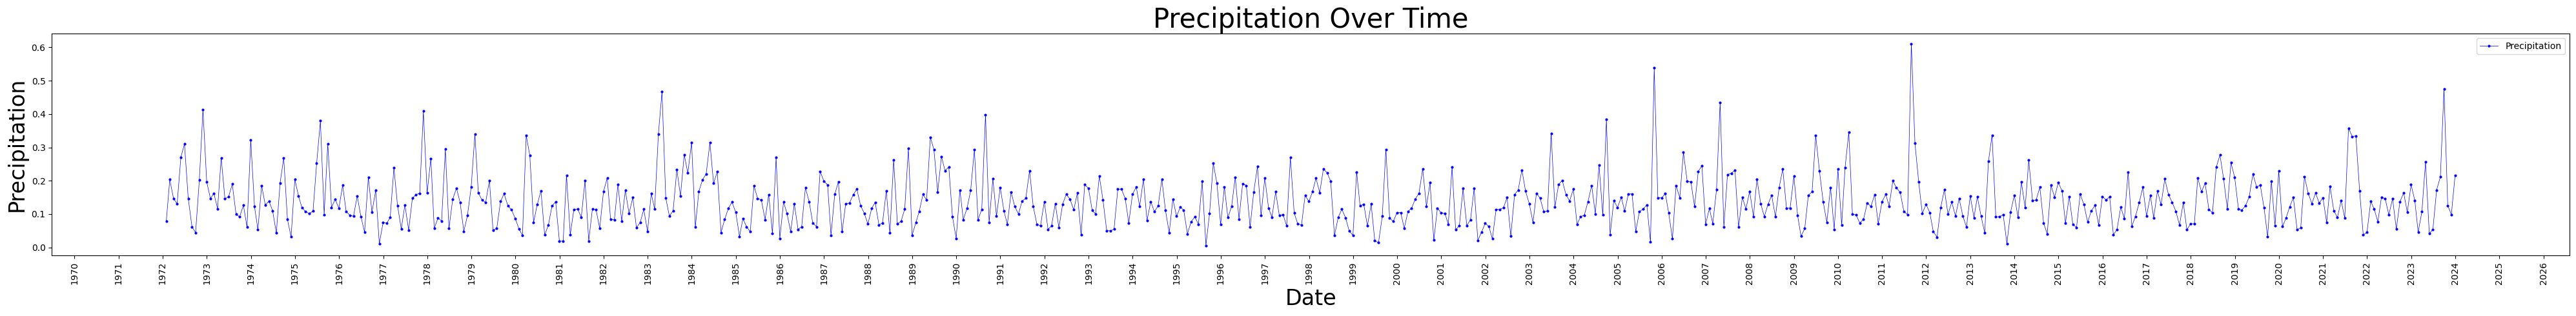

In [41]:
plt.figure(figsize=(40, 5))
plt.plot(df_monthly["Date"], df_monthly["prcp"], marker='o', markersize=2, linestyle='-', linewidth=0.5, color='b', label="Precipitation")
plt.xlabel("Date", size=24)
plt.ylabel("Precipitation", size=24)
plt.title("Precipitation Over Time", size=30)

plt.gca().xaxis.set_major_locator(mdates.YearLocator())  # Yearly ticks
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y"))  # Format as 'YYYY'

plt.xticks(rotation=90)
plt.legend()
plt.grid(False)
plt.tight_layout()

plt.savefig('precip_by_yr.png')
plt.show()

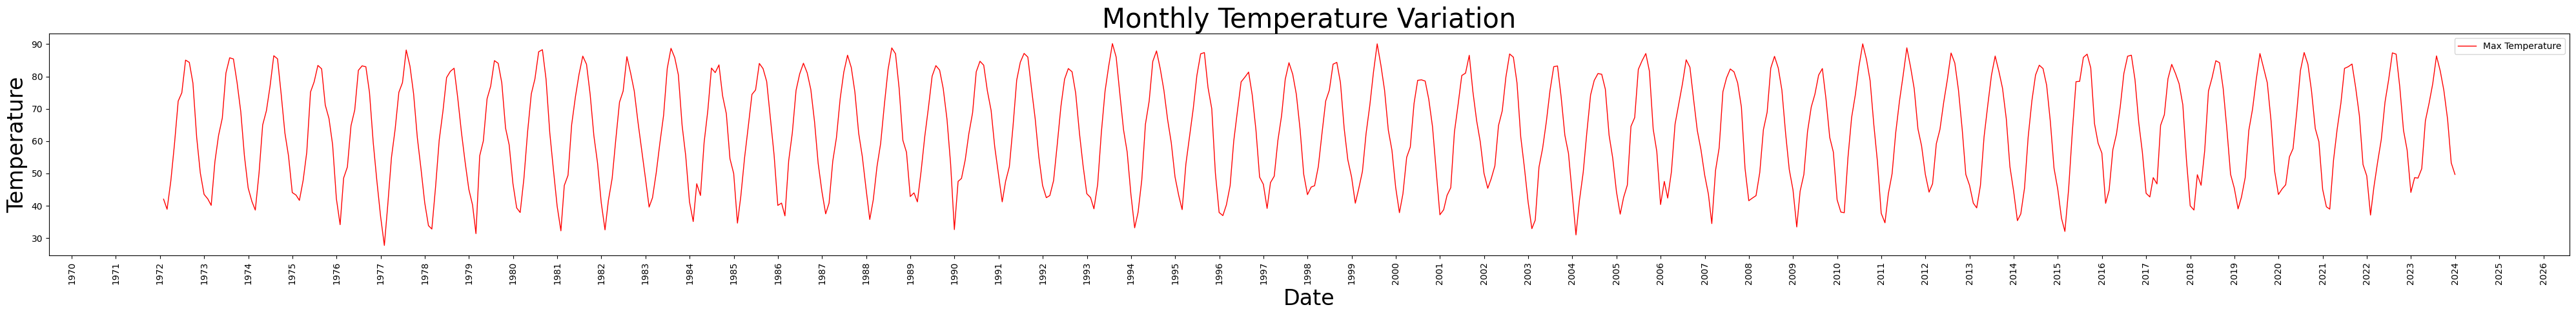

In [40]:
plt.figure(figsize=(40, 5))
plt.plot(df_monthly["Date"], df_monthly["tmax"], linestyle='-', linewidth=1, color='r', label="Max Temperature")
plt.xlabel("Date", size=24)
plt.ylabel("Temperature", size=24)
plt.title("Monthly Temperature Variation", size=30)

# Set x-axis to show only yearly labels
plt.gca().xaxis.set_major_locator(mdates.YearLocator())  # Yearly ticks
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y"))  # Format as 'YYYY'

plt.xticks(rotation=90)  # Rotate labels
plt.legend()
plt.grid(False)
plt.tight_layout()

plt.savefig('temp_r_by_yr.png')
plt.show()

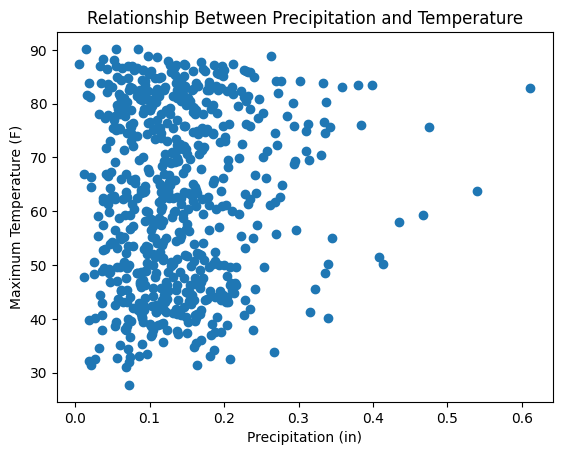

In [25]:
plt.scatter(y=df_monthly['tmax'], x=df_monthly['prcp'])
plt.xlabel('Precipitation (in)')
plt.ylabel('Maximum Temperature (F)')
plt.title("Relationship Between Precipitation and Temperature")
plt.show()

**ACF/PACF plots**

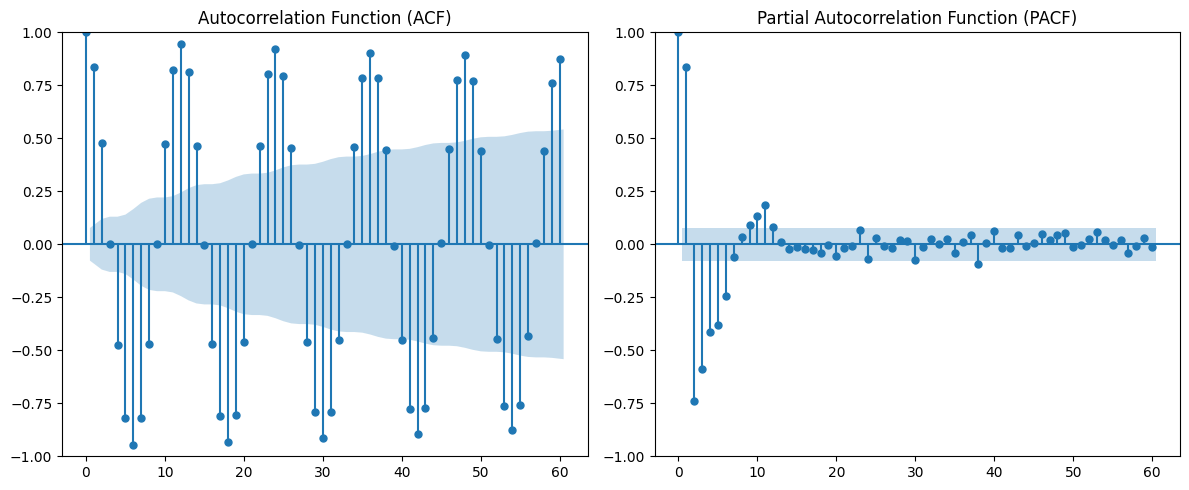

In [32]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# ACF Plot
plot_acf(df_monthly['tmax'], ax=axes[0], lags=60)
axes[0].set_title("Autocorrelation Function (ACF)")

# PACF Plot
plot_pacf(df_monthly['tmax'], ax=axes[1], lags=60, method="ywm")
axes[1].set_title("Partial Autocorrelation Function (PACF)")

plt.tight_layout()
plt.show()

**Seasonal differencing**

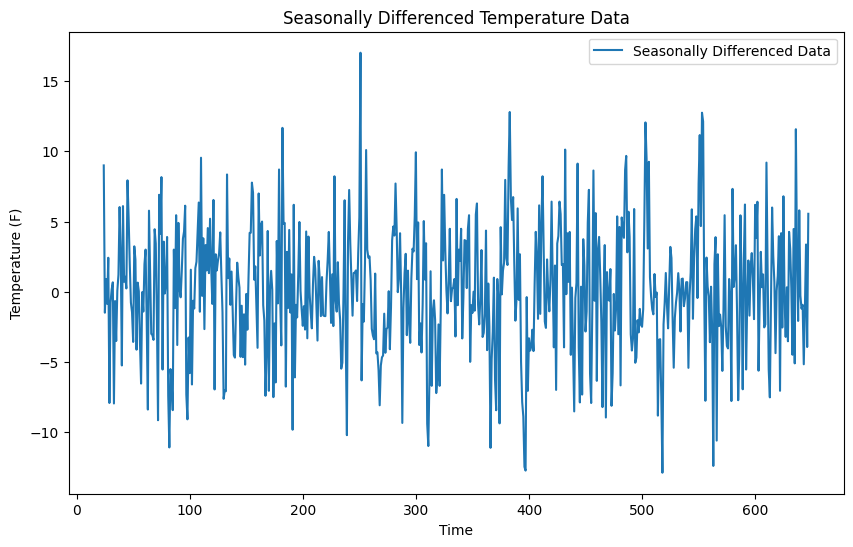

In [35]:
df_monthly['tmax_diff'] = df_monthly['tmax'].diff(12)
df_monthly.dropna(subset=['tmax_diff'], inplace=True)

plt.figure(figsize=(10, 6))
plt.plot(df_monthly['tmax_diff'], label='Seasonally Differenced Data')
plt.title('Seasonally Differenced Temperature Data')
plt.xlabel('Time')
plt.ylabel('Temperature (F)')
plt.legend()
plt.show()

**Seasonal decomposition**

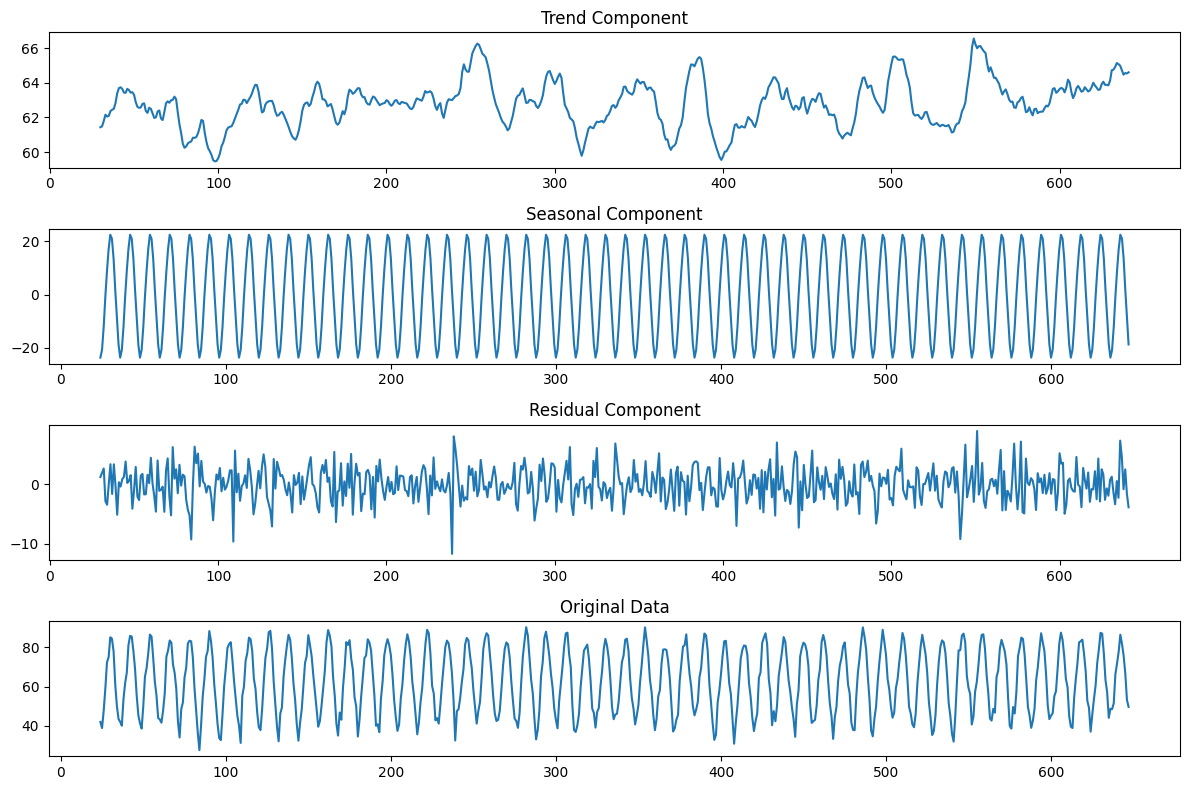

In [37]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Decompose the time series (assuming 'tmax_diff' is already differenced with lag 12)
result = seasonal_decompose(df_monthly['tmax'], model='additive', period=12)

# Plot the decomposition
plt.figure(figsize=(12, 8))

# Plot trend component
plt.subplot(4, 1, 1)
plt.plot(result.trend)
plt.title('Trend Component')

# Plot seasonal component
plt.subplot(4, 1, 2)
plt.plot(result.seasonal)
plt.title('Seasonal Component')

# Plot residual component
plt.subplot(4, 1, 3)
plt.plot(result.resid)
plt.title('Residual Component')

# Plot the original data for comparison
plt.subplot(4, 1, 4)
plt.plot(df_monthly['tmax'])
plt.title('Original Data')

plt.tight_layout()
plt.show()